In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('11-iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


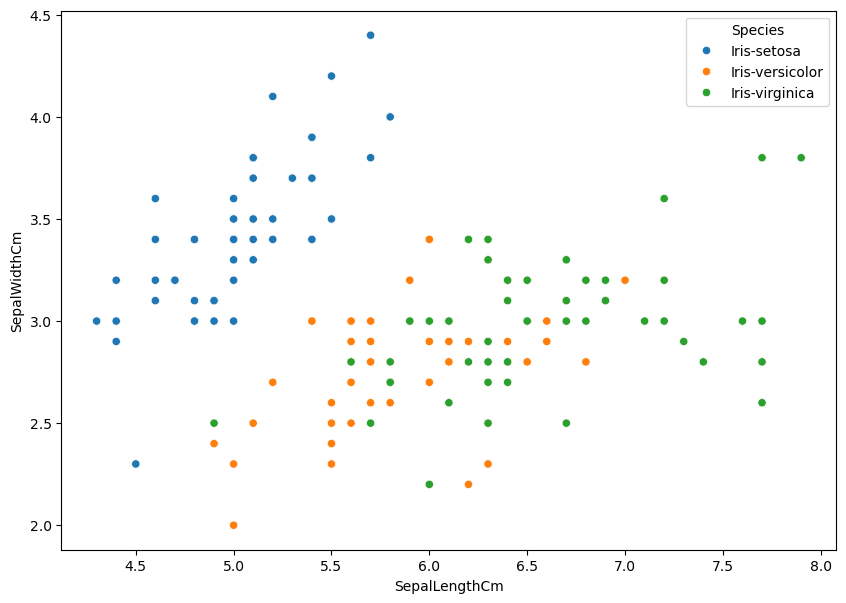

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df['Species'])
plt.show()

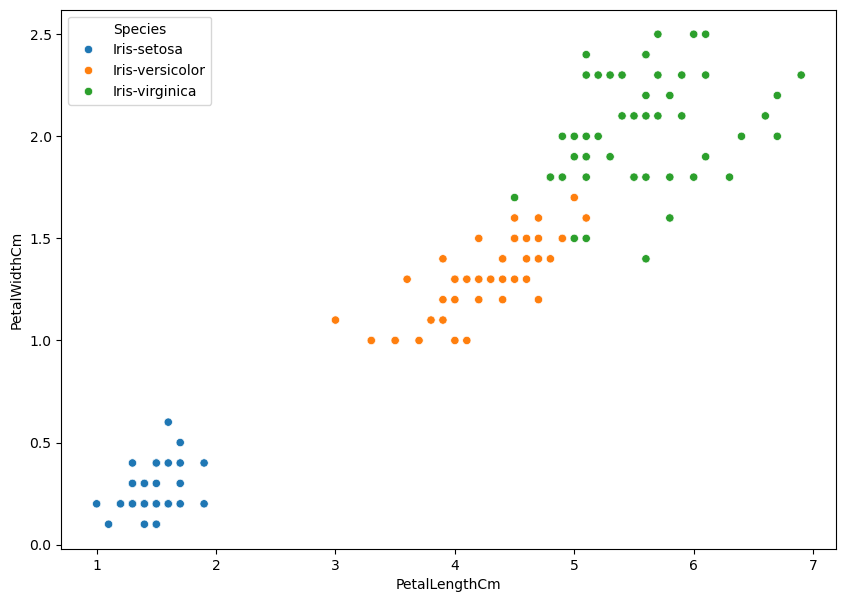

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'])
plt.show()

<Axes: ylabel='Species'>

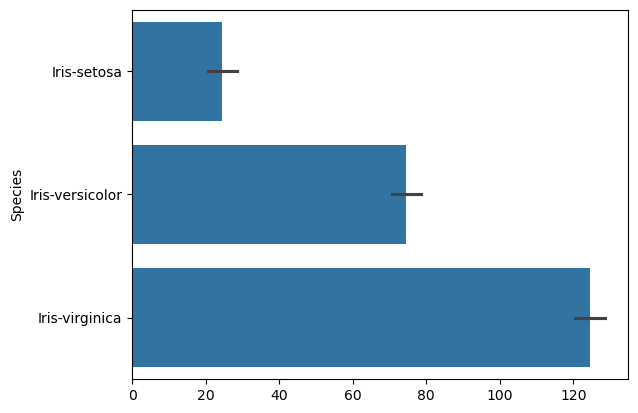

In [13]:
sns.barplot(df['Species'])

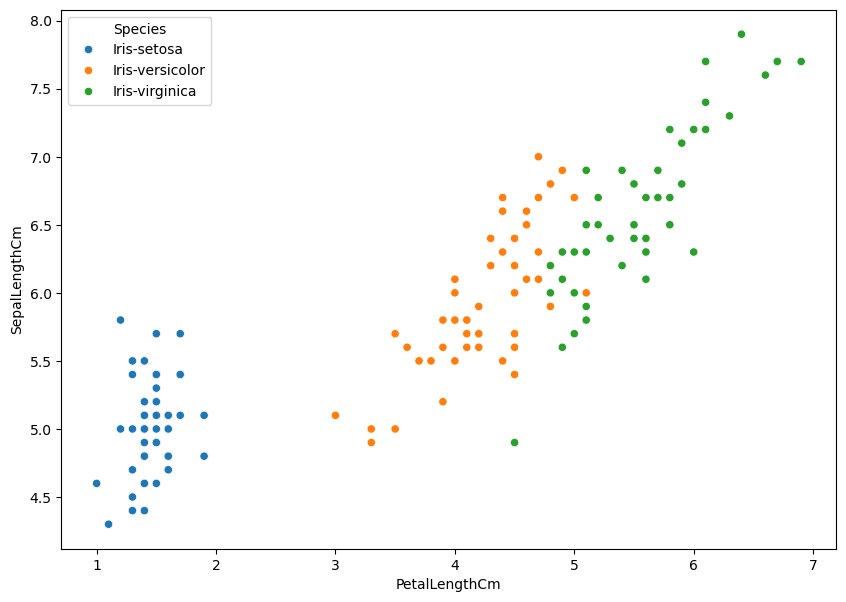

In [14]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['PetalLengthCm'],y=df['SepalLengthCm'],hue=df['Species'])
plt.show()

In [15]:
df.drop('Id',axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder=LabelEncoder()

In [18]:
df['Species']=encoder.fit_transform(df['Species'])

In [19]:
X=df.drop('Species',axis=1)
y=df['Species']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gnb=GaussianNB()

In [27]:
gnb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [28]:
y_pred=gnb.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(confusion_matrix(y_pred,y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [34]:
model_log=LogisticRegression()

In [38]:
param_grid={
    'penalty':['l1','l2','elasticnet'],
    'C':[100,10,0.1,0.01],
    'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']

    
}

In [39]:
log_cv=RandomizedSearchCV(estimator=model_log,param_distributions=param_grid)

In [40]:
    log_cv.fit(X_train,y_train)

C:\Users\Ömer faruk\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ömer faruk\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ömer faruk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ömer faruk\AppData\Roaming\Pyth

,estimator,LogisticRegression()
,param_distributions,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [41]:
log_pred=log_cv.predict(X_test)

In [42]:
print(confusion_matrix(log_pred,y_test))
print(classification_report(log_pred,y_test))

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

